__Note__: Thank you for your interest in my book [Data Science Projects with Python: A case study approach to successful data science projects using Python, pandas, and scikit-learn](https://www.amazon.com/gp/product/1838551026)! This git repo contains all the code referenced in the book. I will periodically update it to make sure it runs with the latest versions of the necessary software. Code cells that are updated from the published text will be noted in comments.

Please see the next cell for the latest versions that are confirmed to work.

Stephen Klosterman

May, 2020

In [1]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))
# The Python version is 3.7.6 (default, Jan  8 2020, 13:42:34) 
# [Clang 4.0.1 (tags/RELEASE_401/final)].

# The Numpy version is 1.18.1.

# The Pandas version is 1.0.1.

# The Matplotlib version is 3.1.3.

# The Scikit-Learn version is 0.22.1.

The Python version is 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)].

The Numpy version is 1.18.1.

The Pandas version is 1.0.1.

The Matplotlib version is 3.1.3.

The Scikit-Learn version is 0.22.1.



# Exercise 19: A Decision Tree in Scikit-Learn

In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [3]:
df = pd.read_csv('../../../Data/Chapter_1_cleaned_data.csv')

In [4]:
features_response = df.columns.tolist()

In [5]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [6]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [8]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [9]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [10]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Need to install graphviz: https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation

In [11]:
# This saves a .dot file to disk, that could be turned in to an image file
# tree.export_graphviz(dt, out_file='../../../Drafts/Chapter 5/Graphics/Ex_1_3.dot',
#                      filled=True, rounded=True,
#                      feature_names=features_response[:-1],
#                      proportion=True, class_names=['Not defaulted', 'Defaulted']) 

In [12]:
dot_data = tree.export_graphviz(dt, out_file=None,
                                filled=True, rounded=True,
                                feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted']) 

In [13]:
# dot_data

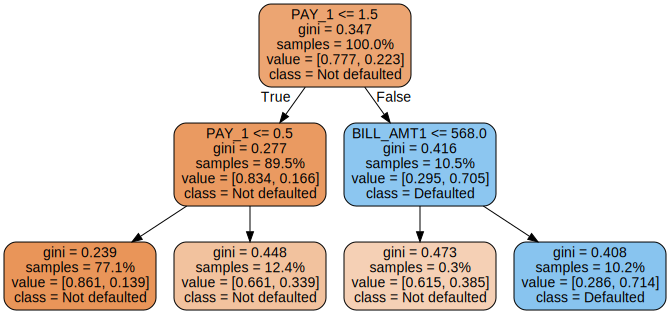

In [14]:
graph = graphviz.Source(dot_data) 
graph

In [15]:
features_response[:-1].index('PAY_1')

4

In [16]:
X_train.shape

(21331, 17)

In [17]:
sum(X_train[:,4] <= 1.5)/X_train.shape[0]

0.8946134733486475

In [18]:
np.mean(y_train)

0.223102526838873

In [19]:
dt.max_depth = None

In [20]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
# # This saves a .dot file to disk, that could be turned in to an image file
# tree.export_graphviz(dt, out_file='../../../Drafts/Chapter 5/Graphics/Ex_1_8.dot',
#                      filled=True, rounded=True,
#                      feature_names=features_response[:-1],
#                      proportion=True, class_names=['Not defaulted', 'Defaulted']) 

# Training Decision Trees: Node Impurity

In [22]:
pm0 = np.linspace(0.01,0.99,99)
pm1 = 1 - pm0

In [23]:
pm0

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [24]:
pm1

array([0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.89,
       0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78,
       0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67,
       0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57, 0.56,
       0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45,
       0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34,
       0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23,
       0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01])

In [25]:
misclassification_rate = np.minimum(pm0, pm1)

In [26]:
misclassification_rate

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45,
       0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34,
       0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23,
       0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01])

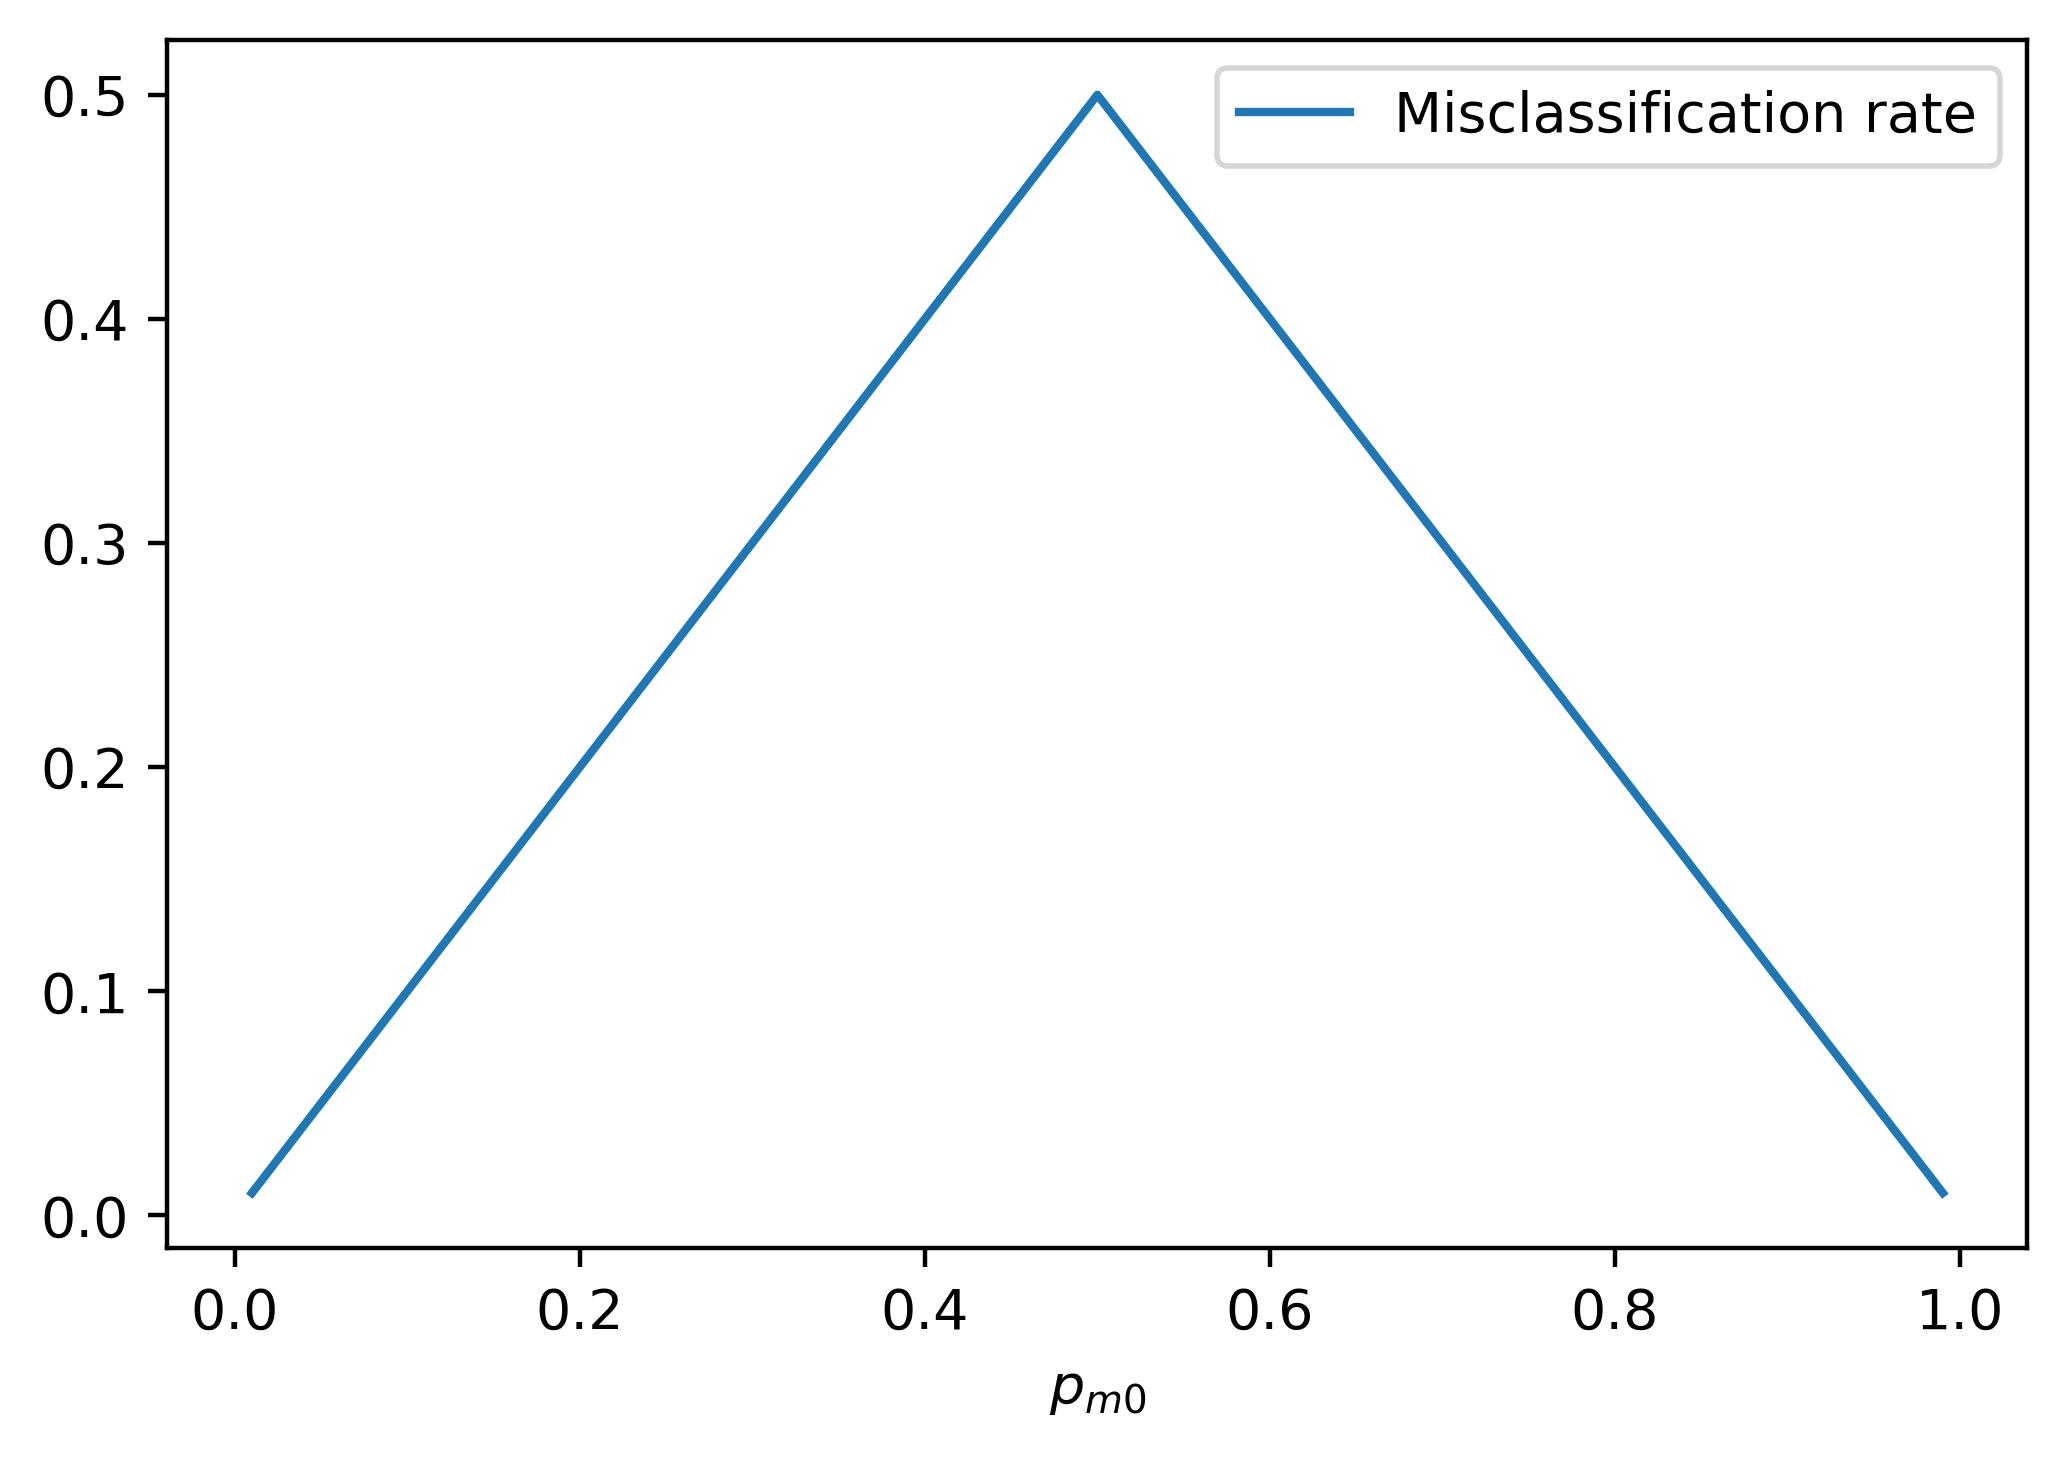

In [27]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.xlabel('$p_{m0}$')
plt.legend()

In [28]:
gini = (pm0 * (1-pm0)) + (pm1 * (1-pm1))

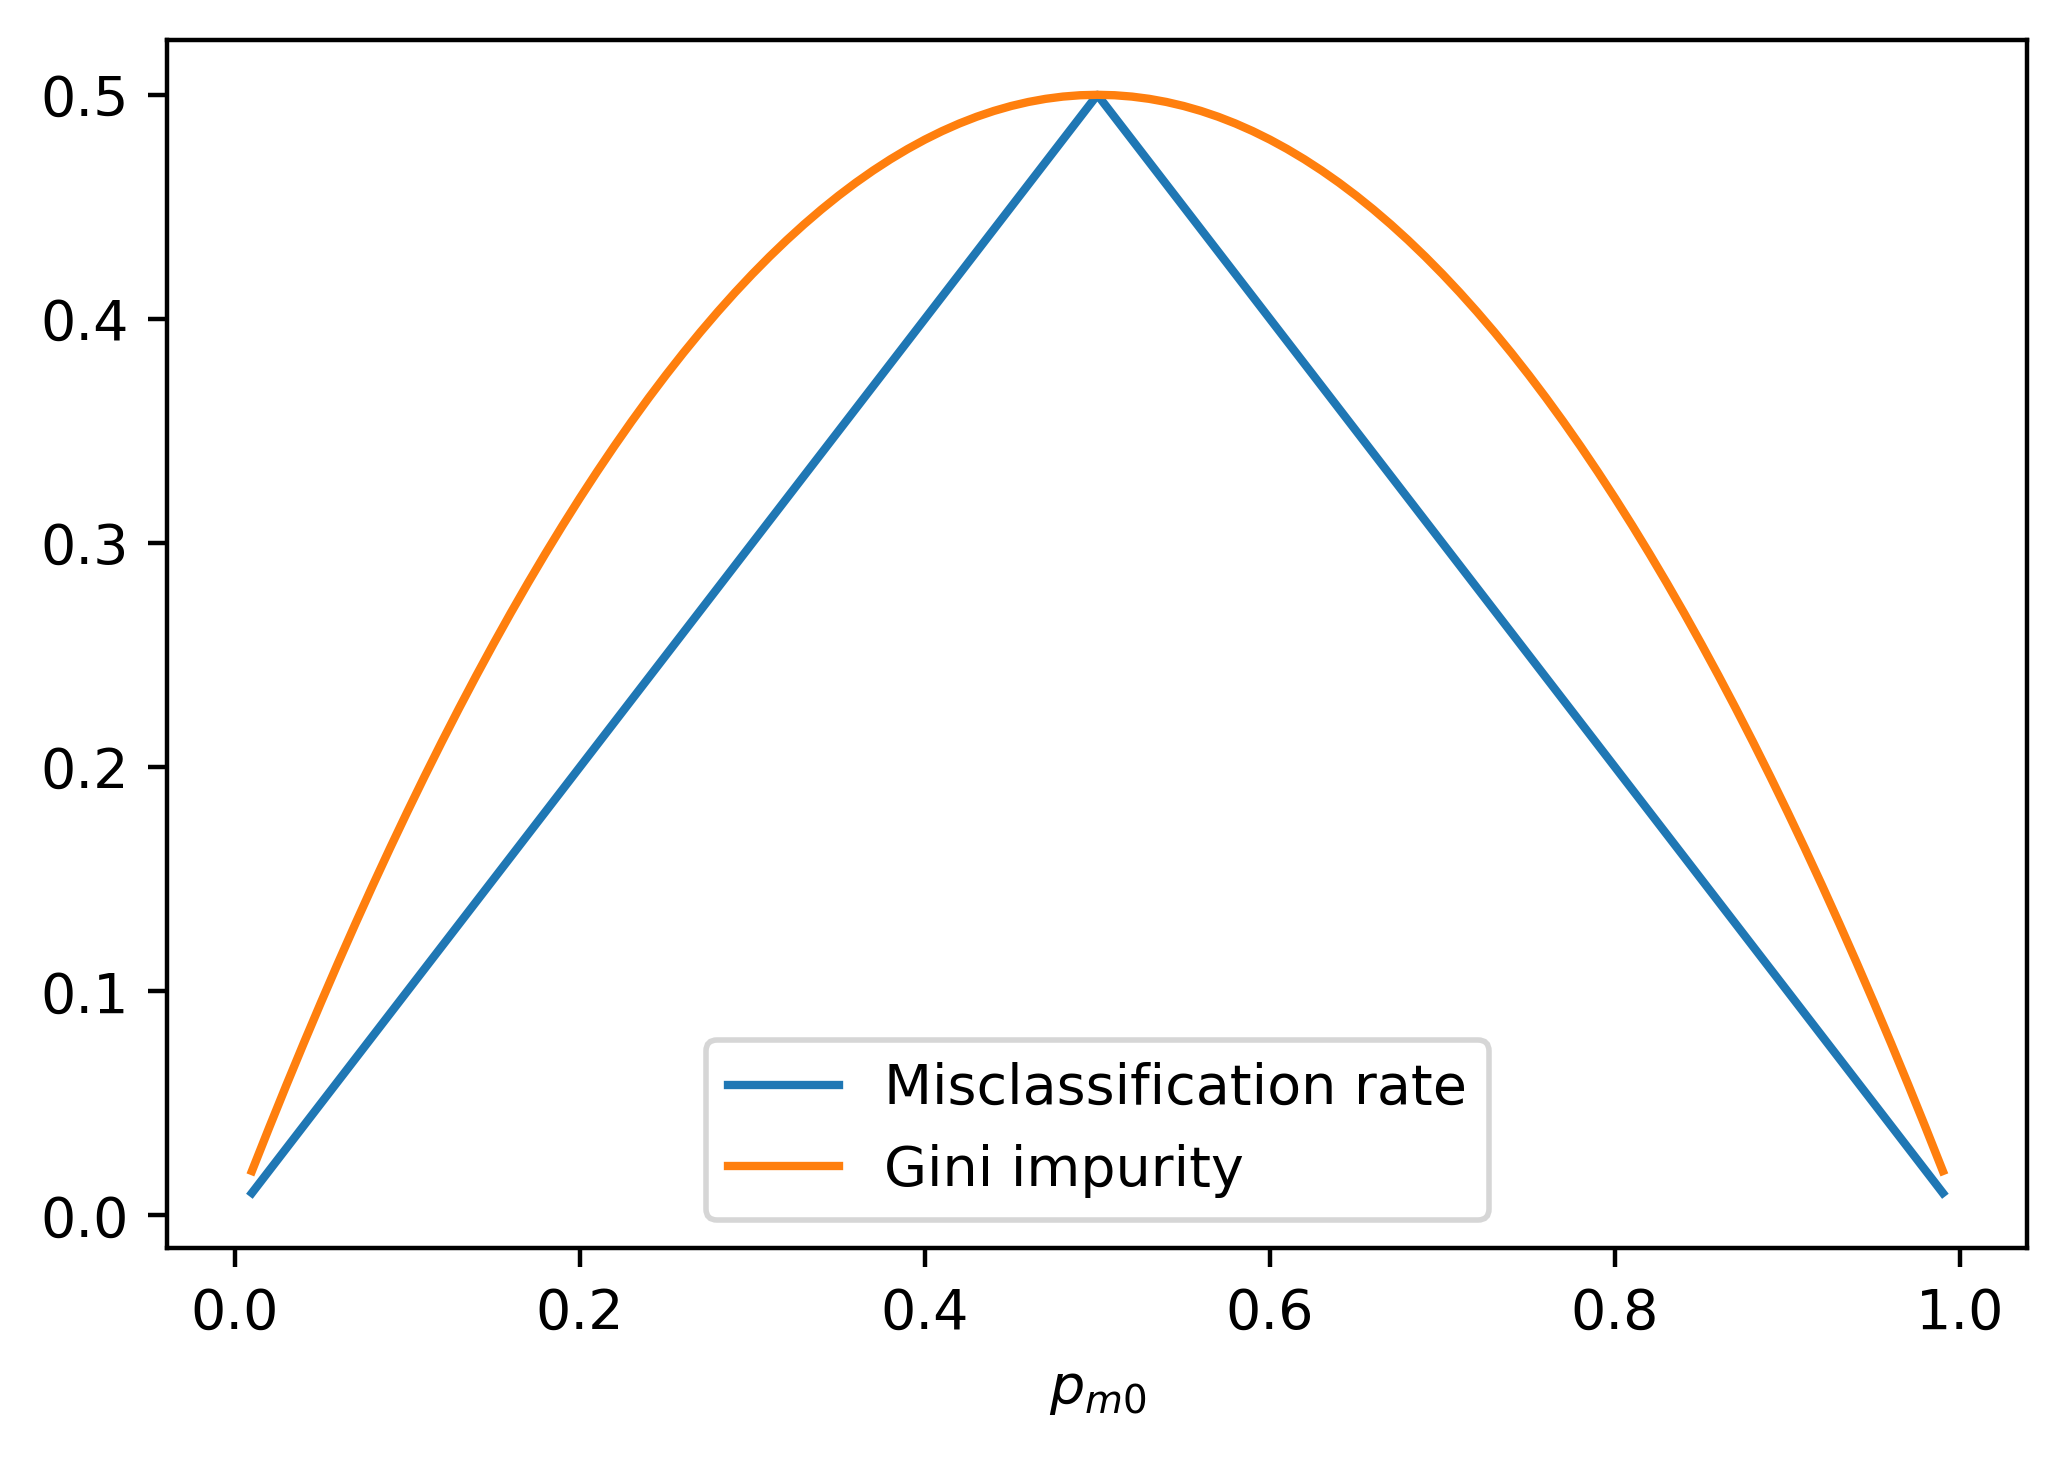

In [29]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.plot(pm0, gini, label='Gini impurity')
plt.xlabel('$p_{m0}$')
plt.legend()

In [30]:
cross_ent = -1*( (pm0 * np.log(pm0)) + (pm1 * np.log(pm1)) )

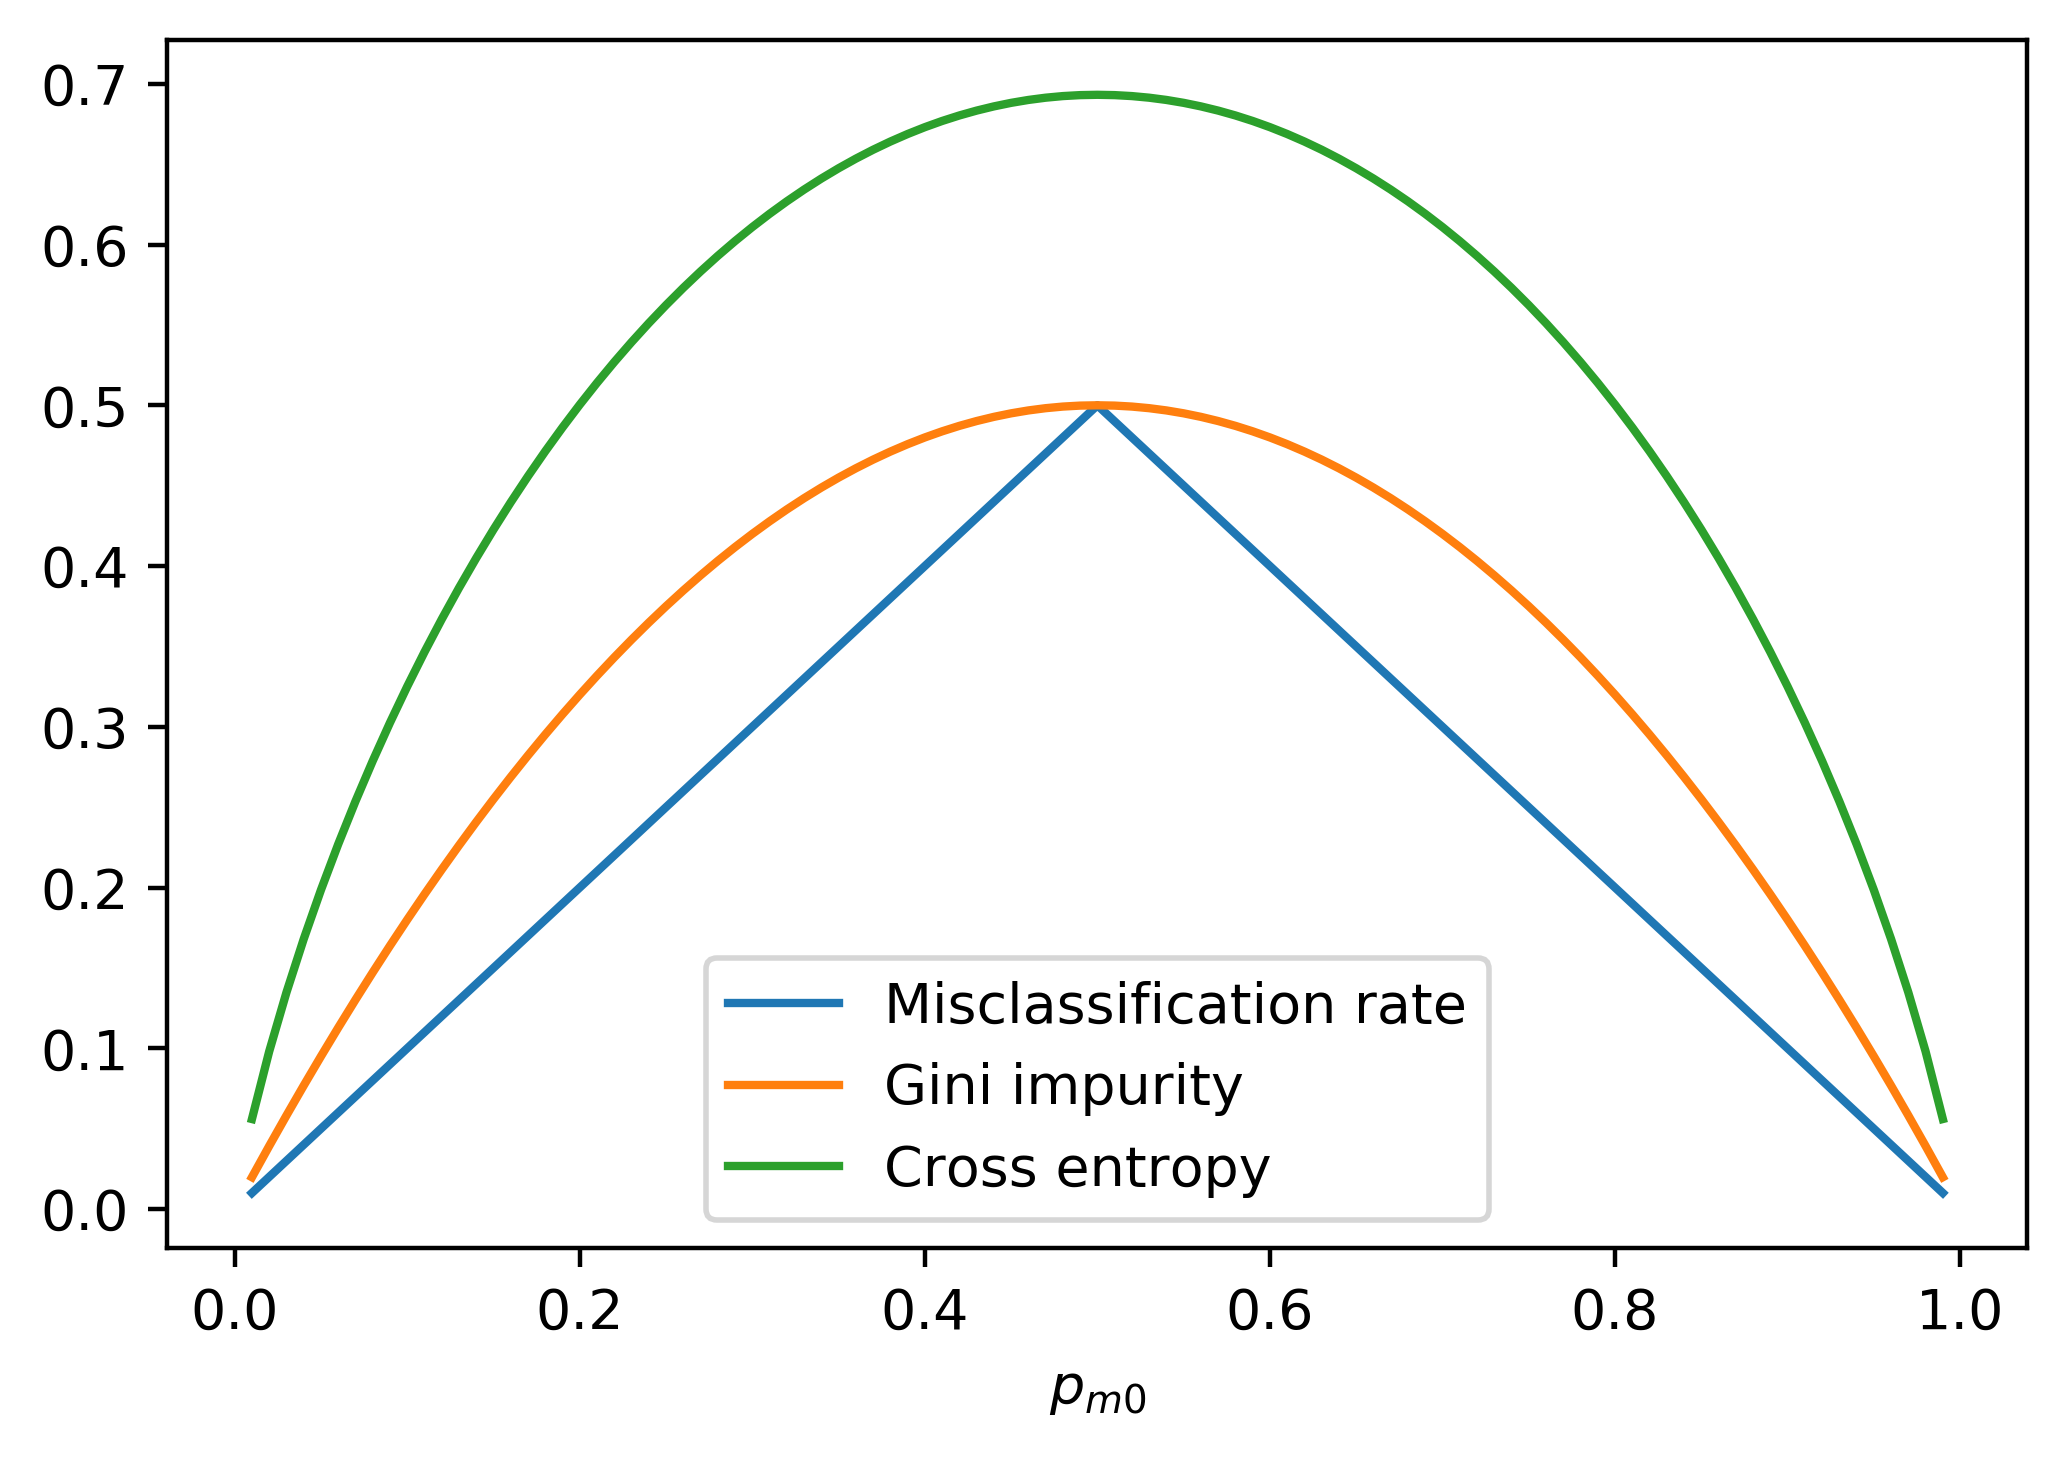

In [31]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.plot(pm0, gini, label='Gini impurity')
plt.plot(pm0, cross_ent, label='Cross entropy')
plt.xlabel('$p_{m0}$')
plt.legend()

# Using Decision Trees: Advantages and Predicted Probabilities
Based on https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [32]:
from sklearn.datasets import make_circles

In [33]:
X_circ, y_circ = make_circles(n_samples = 300, shuffle=True,
                             noise=0.1, random_state=1, factor=0.4)

In [34]:
from matplotlib.colors import ListedColormap

In [35]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

[]

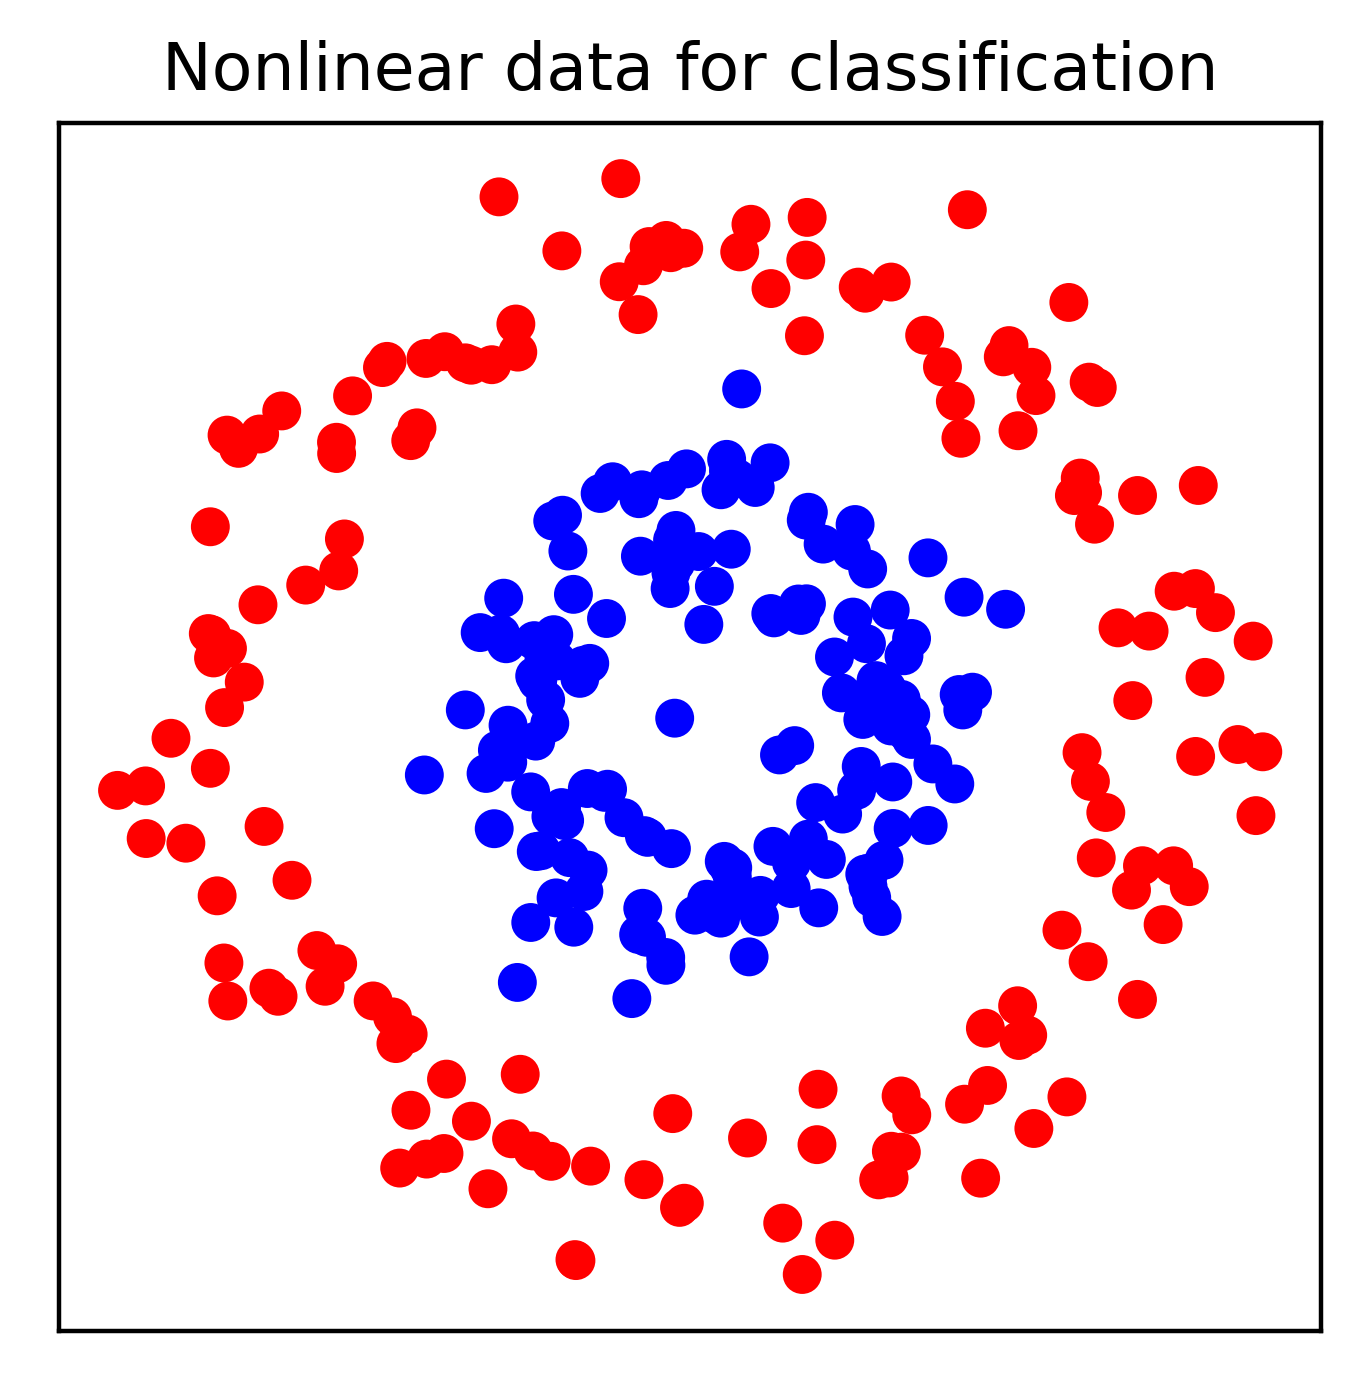

In [36]:
ax = plt.axes()
ax.scatter(X_circ[:,0], X_circ[:,1], c=y_circ, cmap=cm_bright)
ax.set_aspect('equal')
ax.set_title('Nonlinear data for classification')
ax.set_xticks([])
ax.set_yticks([])

In [37]:
x_min, x_max = X_circ[:, 0].min() - .5, X_circ[:, 0].max() + .5
y_min, y_max = X_circ[:, 1].min() - .5, X_circ[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
classifiers = [tree.DecisionTreeClassifier(max_depth=4, random_state=4),
              LogisticRegression()]
titles = ['Decision tree', 'Logistic regression']

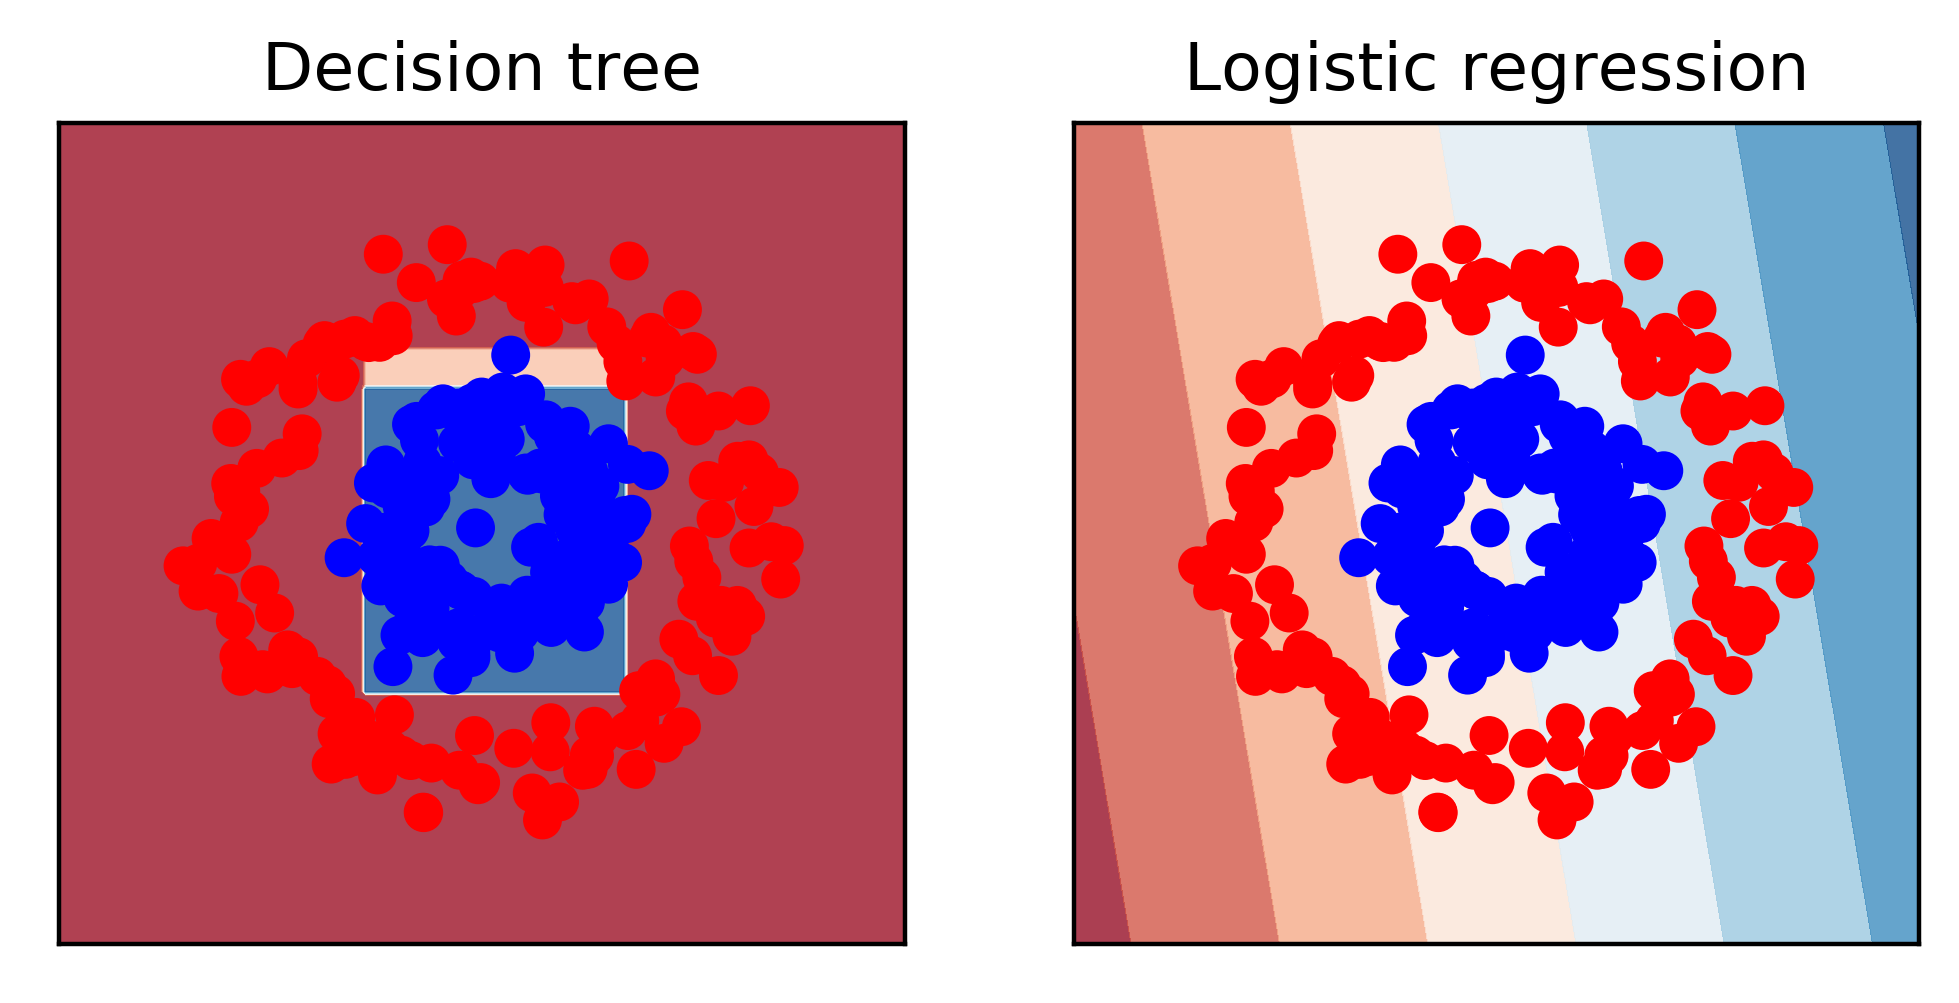

In [40]:
counter = 1
for classif in classifiers:
    ax = plt.subplot(1, 2, counter)
    classif.fit(X_circ, y_circ)
    Z = classif.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    ax.scatter(X_circ[:,0], X_circ[:,1], c=y_circ, cmap=cm_bright)
    ax.set_aspect('equal')
    ax.set_title(titles[counter-1])
    ax.set_xticks([])
    ax.set_yticks([])
    counter+=1

# Exercise 20: Finding Optimal Hyperparameters for a Decision Tree

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
X_train.shape

(21331, 17)

In [43]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}
# params = {'max_depth':list(range(1,13))}

In [44]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)
#5/2020: removed arguments fit_params, iid

In [45]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    3.2s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             p

In [46]:
# cv.cv_results_

In [47]:
cv_results_df = pd.DataFrame(cv.cv_results_)

In [48]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.022728,0.004989,0.002697,0.000550,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.038832,0.005143,0.002786,0.000437,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.066971,0.002716,0.002719,0.000142,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.110650,0.006633,0.003075,0.000463,6,{'max_depth': 6},0.744480,0.746479,0.752771,0.741517,0.746312,0.004126,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.143336,0.018402,0.002860,0.000128,8,{'max_depth': 8},0.728361,0.731886,0.753653,0.728995,0.735724,0.010436,3,0.812061,0.808353,0.803554,0.802413,0.806595,0.003863
5,0.161700,0.007703,0.003108,0.000084,10,{'max_depth': 10},0.707792,0.706774,0.719099,0.716203,0.712467,0.005296,4,0.848747,0.854491,0.841360,0.836694,0.845323,0.006818
6,0.181382,0.006112,0.003652,0.000636,12,{'max_depth': 12},0.670961,0.658200,0.675350,0.678520,0.670758,0.007731,6,0.890147,0.903728,0.885570,0.875587,0.888758,0.010120


In [49]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

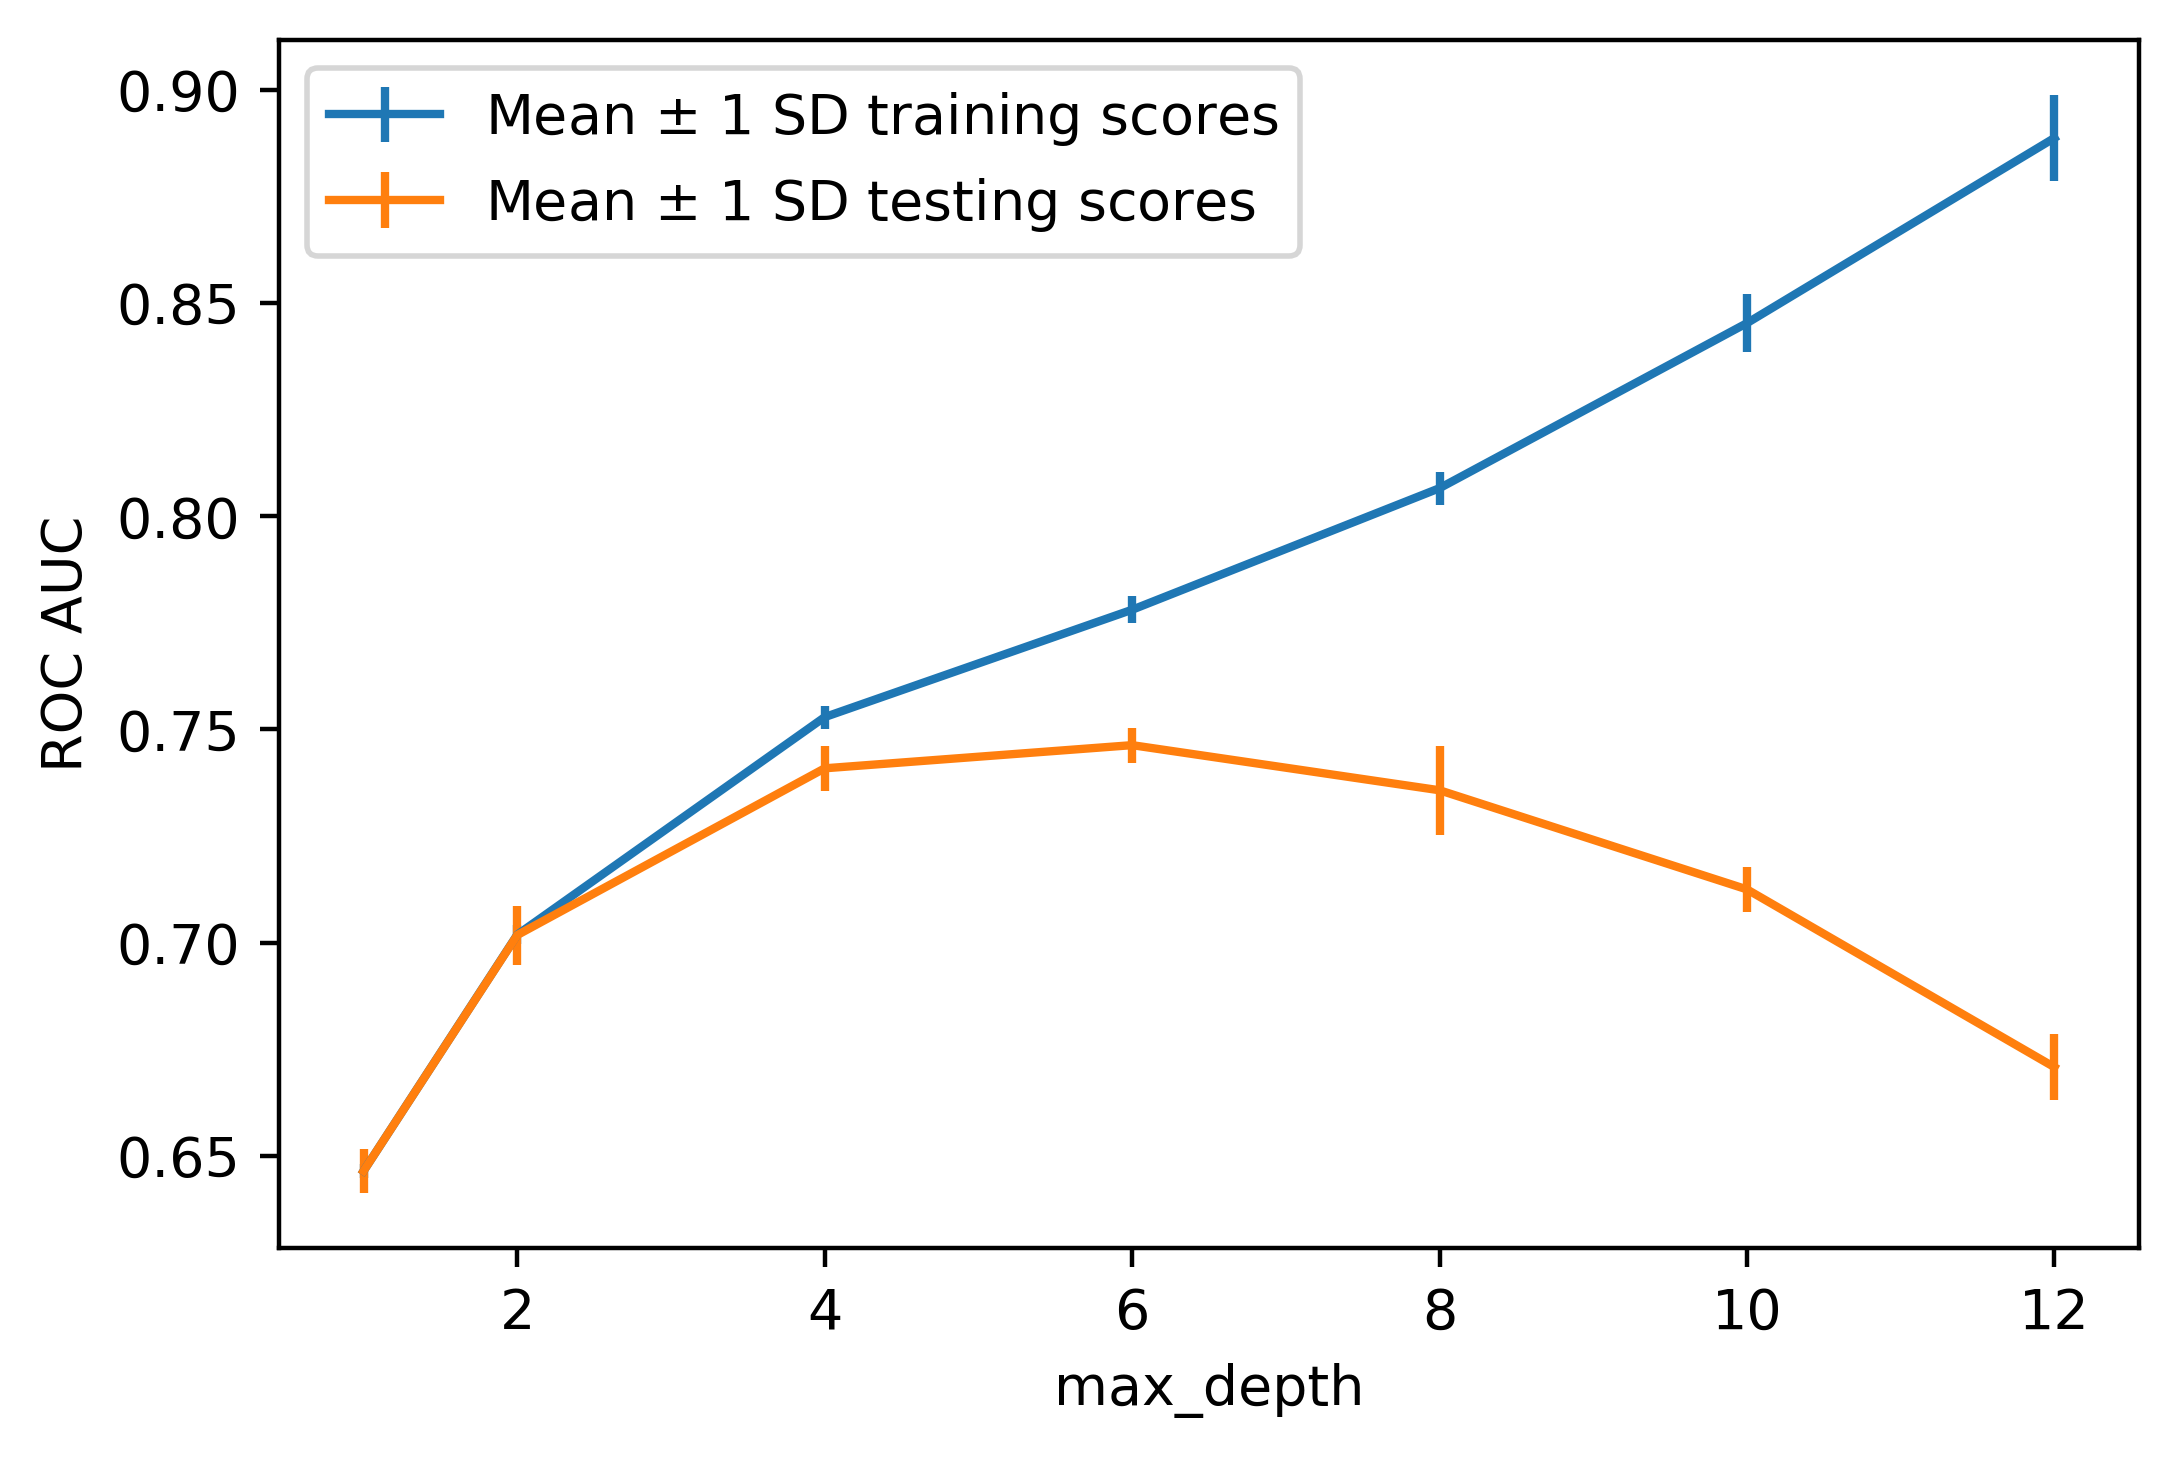

In [50]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [51]:
cv_results_df.max()

mean_fit_time          0.181382
std_fit_time           0.018402
mean_score_time        0.003652
std_score_time         0.000636
param_max_depth       12.000000
split0_test_score      0.744480
split1_test_score      0.746479
split2_test_score      0.753653
split3_test_score      0.743731
mean_test_score        0.746312
std_test_score         0.010436
rank_test_score        7.000000
split0_train_score     0.890147
split1_train_score     0.903728
split2_train_score     0.885570
split3_train_score     0.875587
mean_train_score       0.888758
std_train_score        0.010120
dtype: float64

# Exercise 21: Fitting a Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

In [54]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [55]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, refit=True, cv=4, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)
#5/2020: removed arguments fit_params, iid

In [56]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   27.7s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [57]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

In [58]:
cv_rf_ex_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.133135,0.007342,0.009691,0.002173,10,{'n_estimators': 10},0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,10,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.219329,0.001535,0.010748,0.002049,20,{'n_estimators': 20},0.745612,0.753712,0.777616,0.771737,0.762169,0.012998,9,0.772819,0.771499,0.765944,0.765395,0.768914,0.003284
2,0.334764,0.041946,0.014782,0.001609,30,{'n_estimators': 30},0.747259,0.754154,0.777954,0.771825,0.762798,0.012524,7,0.774655,0.772100,0.765026,0.766697,0.769620,0.003910
3,0.420025,0.009905,0.018935,0.002517,40,{'n_estimators': 40},0.746682,0.754553,0.777709,0.773134,0.763020,0.012813,4,0.774300,0.772642,0.765051,0.765876,0.769467,0.004057
4,0.603771,0.032545,0.024042,0.004491,50,{'n_estimators': 50},0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,1,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
5,0.708126,0.050947,0.032701,0.012652,60,{'n_estimators': 60},0.748437,0.755604,0.779478,0.770978,0.763624,0.012252,2,0.775419,0.773615,0.766133,0.767032,0.770550,0.004031
6,0.759801,0.065021,0.028965,0.003400,70,{'n_estimators': 70},0.747491,0.754465,0.779104,0.771023,0.763021,0.012620,3,0.774420,0.773379,0.765960,0.766174,0.769983,0.003934
7,0.871653,0.054684,0.035506,0.004845,80,{'n_estimators': 80},0.747424,0.754488,0.778753,0.770872,0.762884,0.012502,5,0.774234,0.773257,0.765978,0.766220,0.769922,0.003840
8,0.952613,0.035028,0.043253,0.012839,90,{'n_estimators': 90},0.747097,0.753794,0.778507,0.770426,0.762456,0.012571,8,0.774095,0.772973,0.766022,0.765748,0.769709,0.003846
9,1.070056,0.023735,0.043608,0.003160,100,{'n_estimators': 100},0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,6,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750


In [59]:
cv_rf_ex_results_df.max()

mean_fit_time           1.070056
std_fit_time            0.065021
mean_score_time         0.043608
std_score_time          0.012839
param_n_estimators    100.000000
split0_test_score       0.748437
split1_test_score       0.755878
split2_test_score       0.779478
split3_test_score       0.773134
mean_test_score         0.763651
std_test_score          0.014656
rank_test_score        10.000000
split0_train_score      0.775419
split1_train_score      0.774025
split2_train_score      0.766133
split3_train_score      0.767032
mean_train_score        0.770550
std_train_score         0.004191
dtype: float64

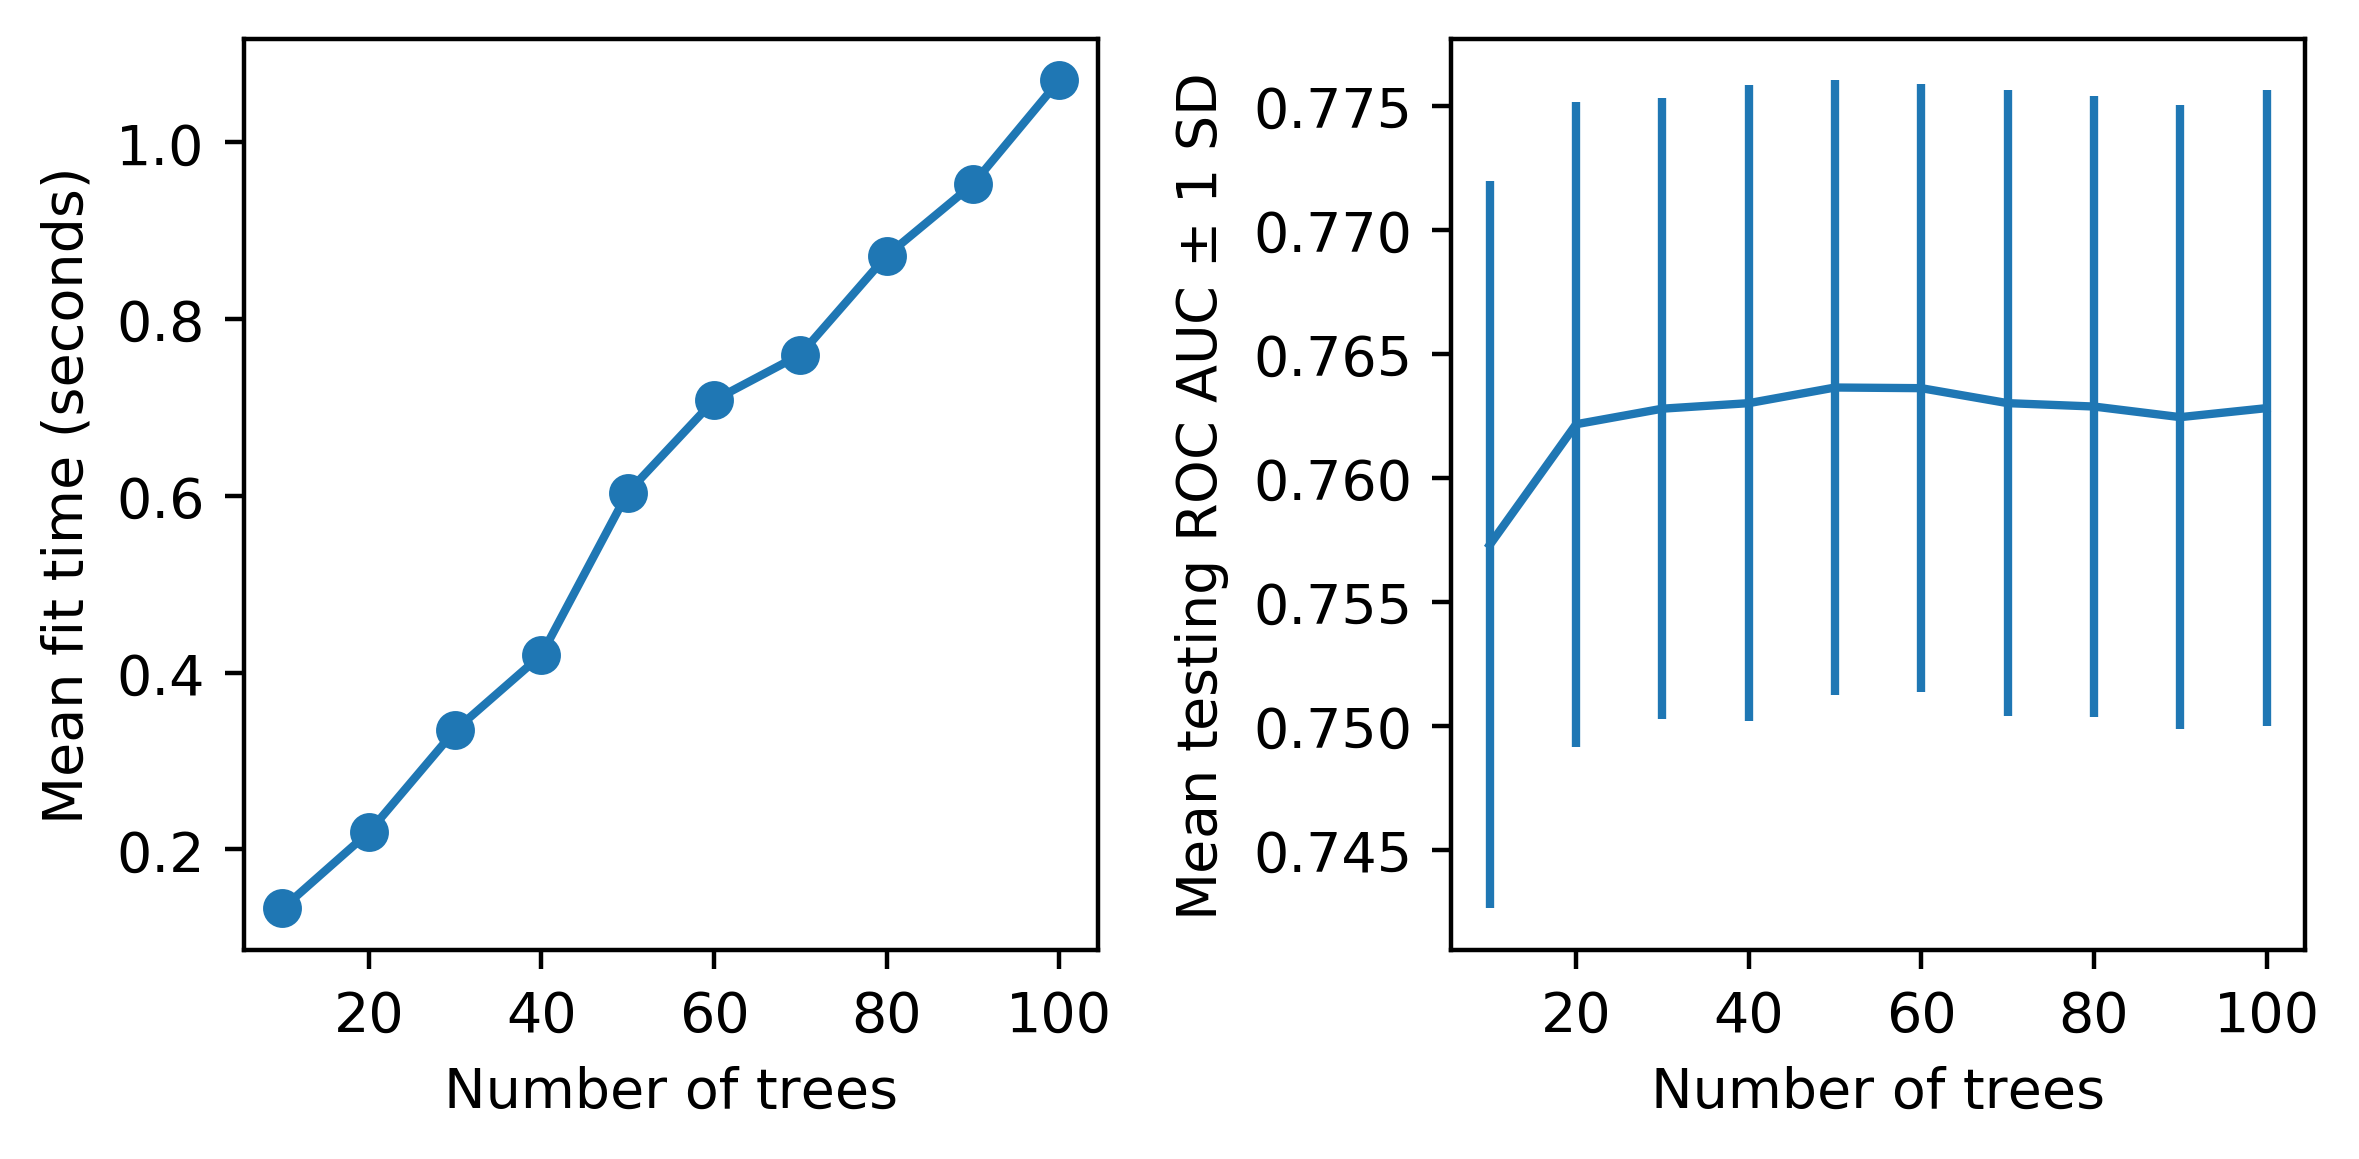

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [61]:
cv_rf_ex.best_params_

{'n_estimators': 50}

In [62]:
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})

In [63]:
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.609609
11,PAY_AMT1,0.094123
0,LIMIT_BAL,0.079265
13,PAY_AMT3,0.047067
12,PAY_AMT2,0.035393
6,BILL_AMT2,0.022422
14,PAY_AMT4,0.021164
15,PAY_AMT5,0.015962
10,BILL_AMT6,0.014293
8,BILL_AMT4,0.013454


# Checkerboard Graph

In [64]:
xx_example, yy_example = np.meshgrid(range(5), range(5))
print(xx_example)
print(yy_example)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [65]:
z_example = np.arange(1,17).reshape(4,4)
z_example

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Text(0, 0.5, 'Y coordinate')

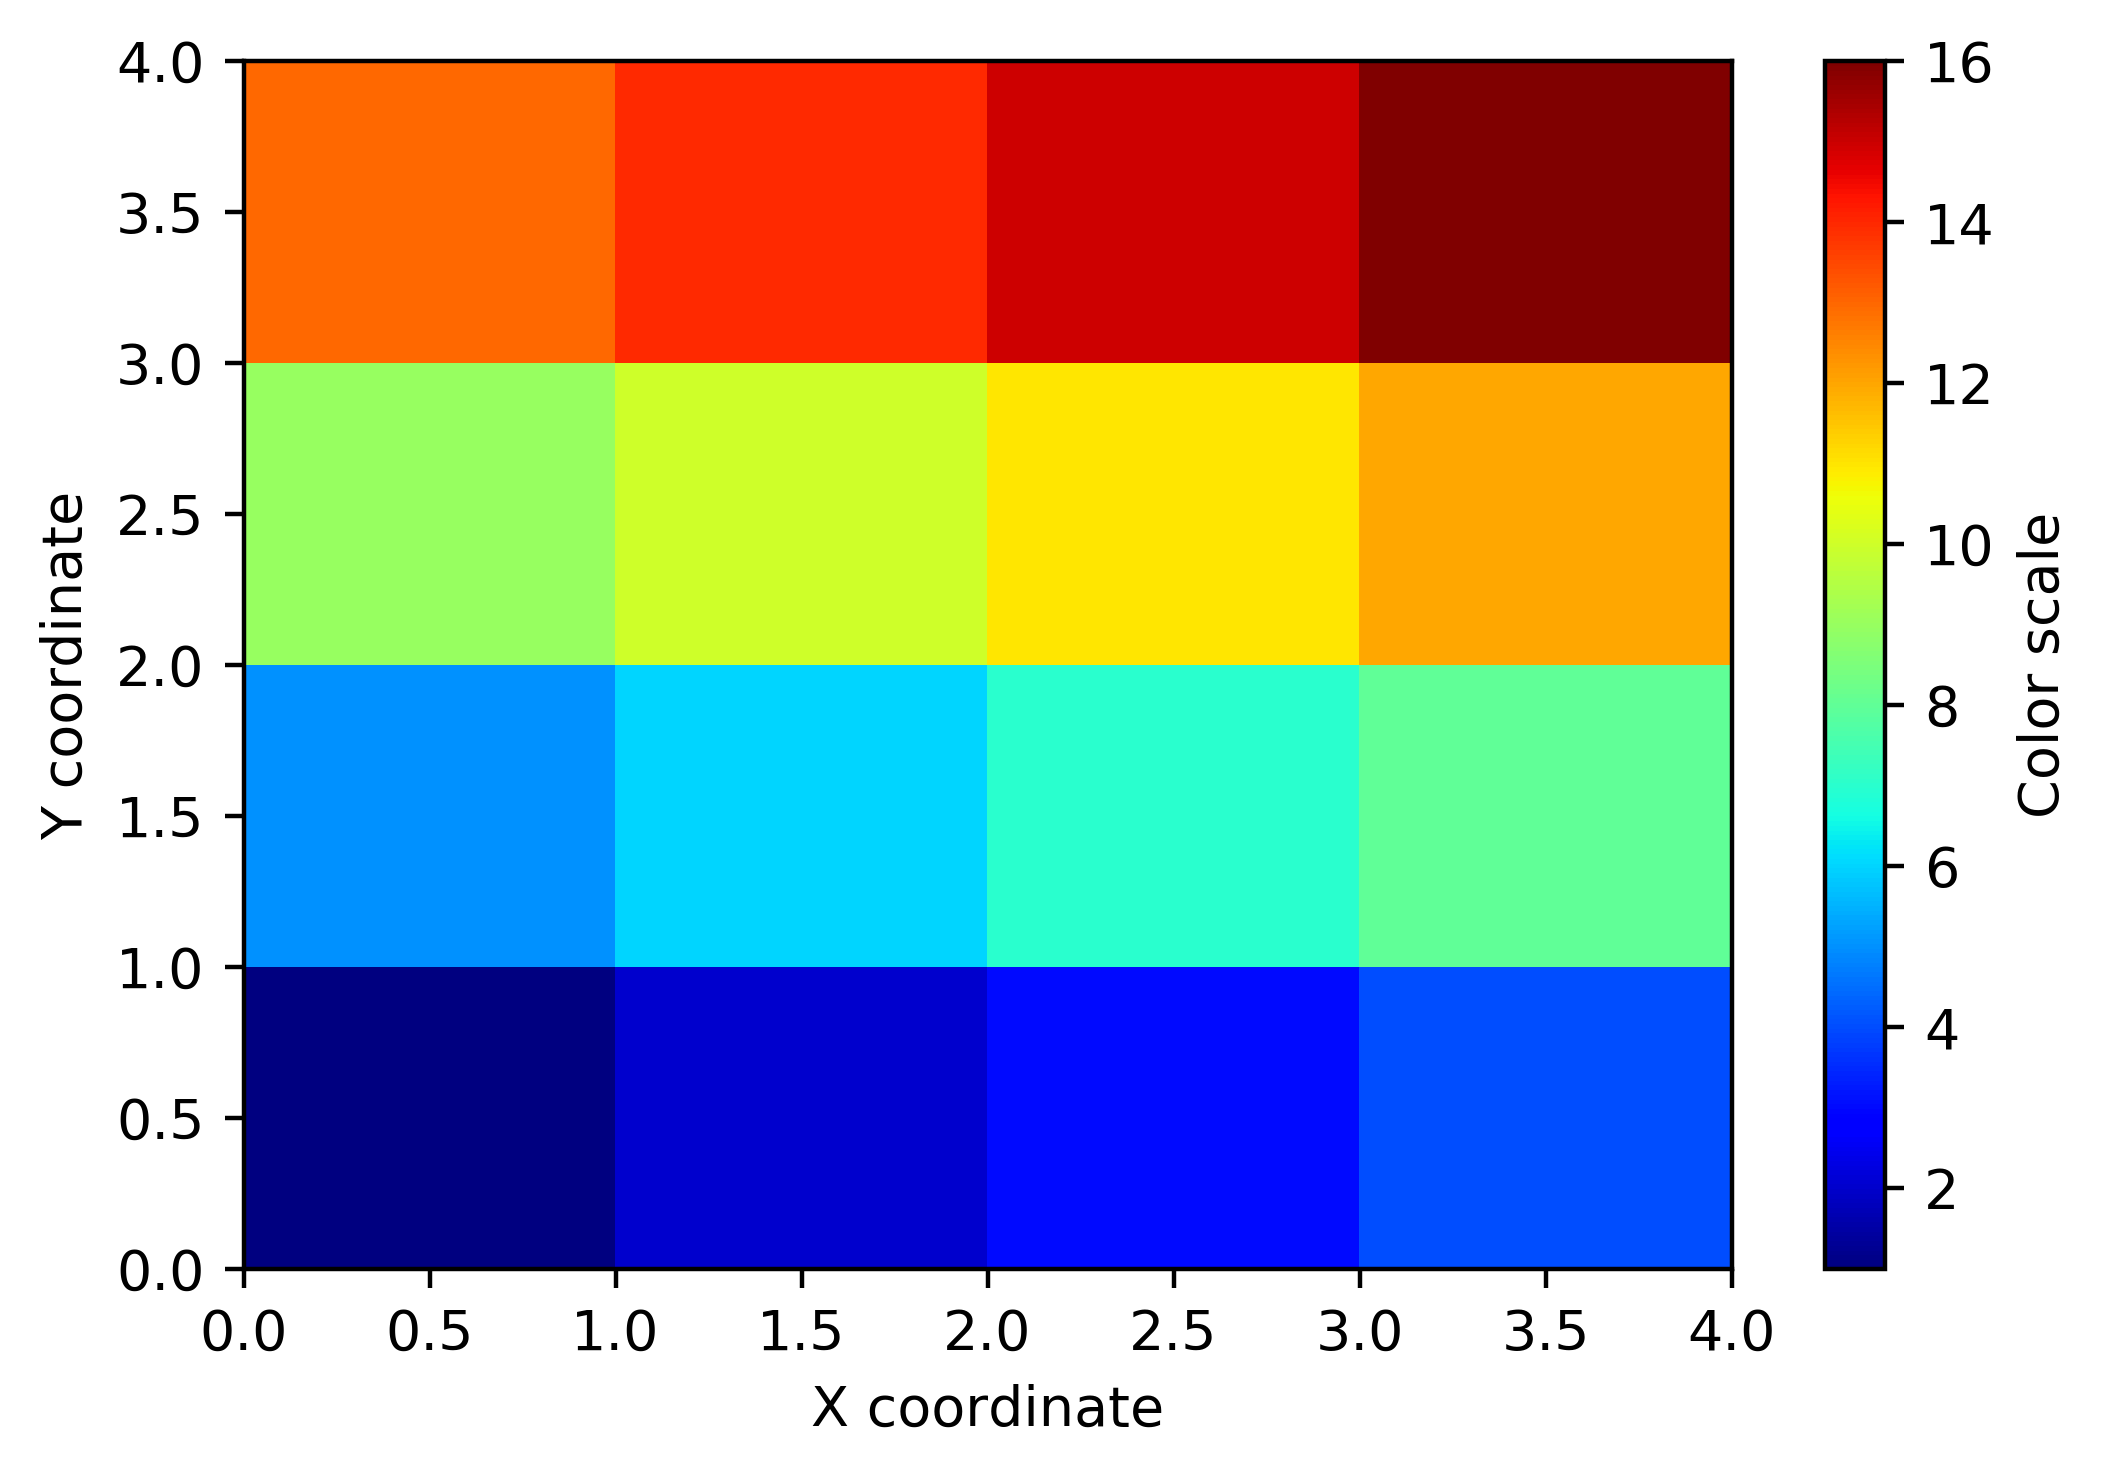

In [66]:
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

# Activity 5: Cross-Validation Grid Search with Random Forest

In [67]:
rf_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [69]:
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc',
                  n_jobs=-1, refit=True, cv=4, verbose=2,
                  error_score=np.nan, return_train_score=True)
#5/2020: removed arguments fit_params, iid

In [70]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   59.1s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [71]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

In [72]:
cv_rf_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.215655,0.005495,0.013857,0.003047,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,15,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.972178,0.010355,0.039049,0.005373,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,12,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
2,1.925931,0.020676,0.076060,0.004857,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,13,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750
3,4.280504,0.037399,0.141457,0.002046,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747454,0.753057,0.777644,0.771729,0.762471,0.012550,14,0.774453,0.773534,0.766139,0.767404,0.770382,0.003653
4,0.328721,0.006277,0.012804,0.001076,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.752905,0.758904,0.780036,0.774017,0.766466,0.010980,11,0.795911,0.796476,0.793695,0.796446,0.795632,0.001141
5,1.579084,0.015988,0.039173,0.001626,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.760089,0.765251,0.788567,0.778669,0.773144,0.011193,8,0.807081,0.805109,0.799176,0.801229,0.803149,0.003113
6,2.978874,0.025861,0.075728,0.002161,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.760964,0.765515,0.788793,0.778936,0.773552,0.011004,7,0.808194,0.806130,0.800846,0.803123,0.804573,0.002808
7,5.846428,0.015457,0.151912,0.002075,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.761481,0.765319,0.787854,0.779745,0.773600,0.010682,6,0.808276,0.806853,0.800682,0.804006,0.804954,0.002906
8,0.409583,0.006309,0.013773,0.000827,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.757853,0.755444,0.781544,0.773823,0.767166,0.010899,10,0.854161,0.856197,0.850317,0.852039,0.853178,0.002211
9,2.055548,0.010785,0.049389,0.002105,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.763956,0.764420,0.786690,0.780255,0.773830,0.009908,4,0.867242,0.871380,0.868213,0.867390,0.868557,0.001672


In [73]:
cv_rf_results_df.max()

mean_fit_time          10.918190
std_fit_time            0.078774
mean_score_time         0.219686
std_score_time          0.009770
param_max_depth        12.000000
param_n_estimators    200.000000
split0_test_score       0.765910
split1_test_score       0.767541
split2_test_score       0.790255
split3_test_score       0.783513
mean_test_score         0.776199
std_test_score          0.014656
rank_test_score        16.000000
split0_train_score      0.945018
split1_train_score      0.949378
split2_train_score      0.946415
split3_train_score      0.944689
mean_train_score        0.946375
std_train_score         0.004263
dtype: float64

Looks like, from max_depth = 3, 6, 9, 12... 9 is best. The more trees the better.

In [74]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))

In [75]:
cm_rf = plt.cm.jet

Text(0, 0.5, 'Maximum depth')

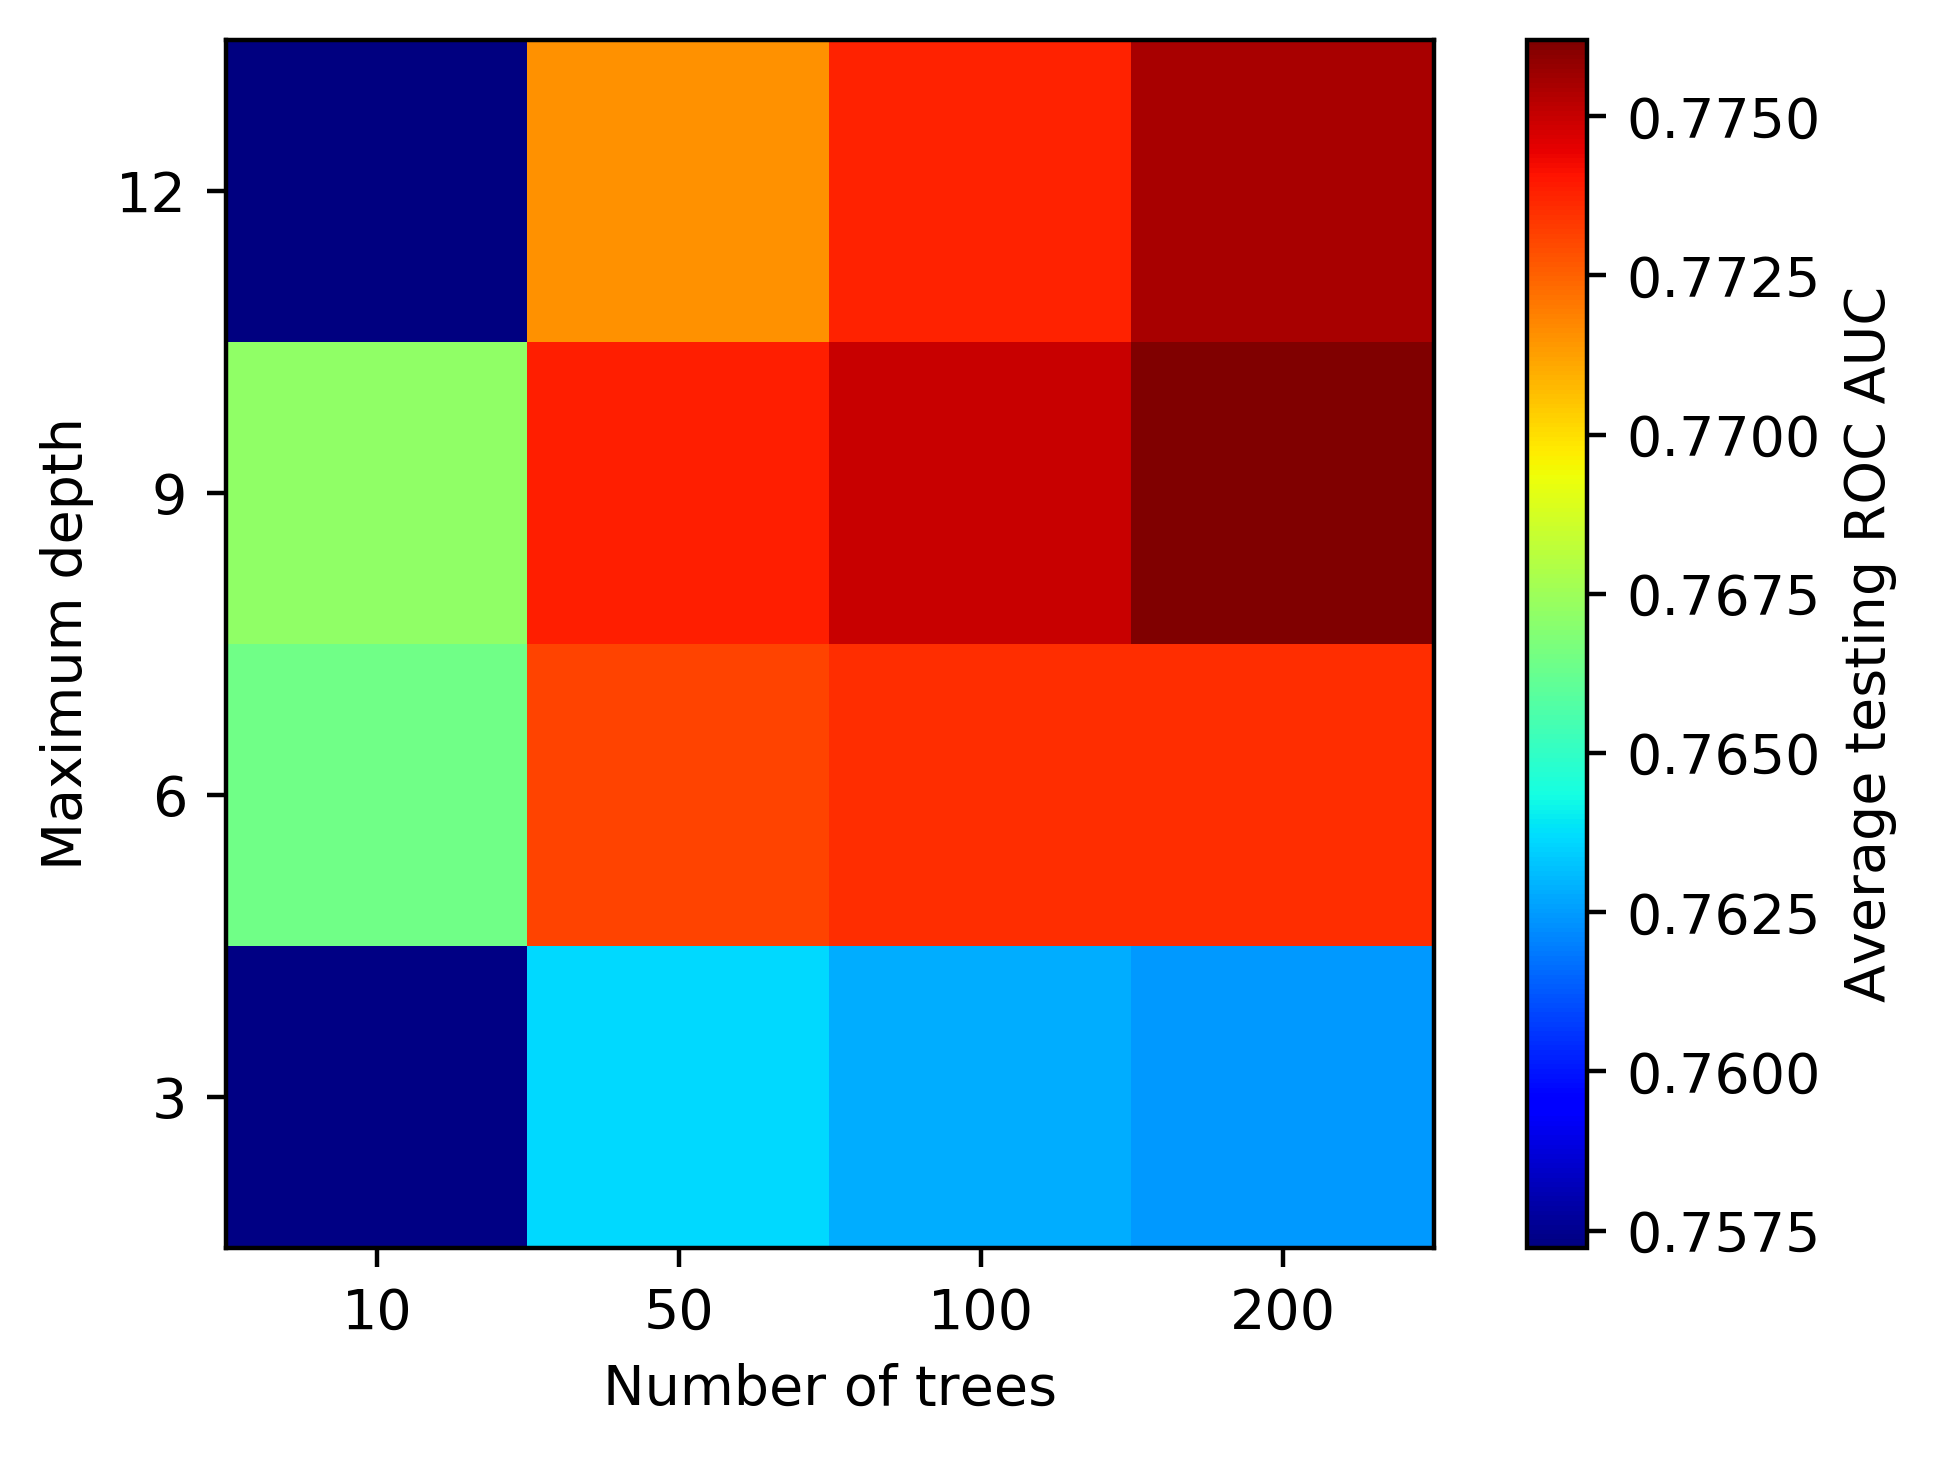

In [76]:
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

In [77]:
cv_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [78]:
feat_imp_df_act = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf.best_estimator_.feature_importances_
})

In [79]:
feat_imp_df_act.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.437439
0,LIMIT_BAL,0.059961
11,PAY_AMT1,0.059434
12,PAY_AMT2,0.045518
13,PAY_AMT3,0.043299
5,BILL_AMT1,0.042195
6,BILL_AMT2,0.041562
7,BILL_AMT3,0.037268
14,PAY_AMT4,0.034321
8,BILL_AMT4,0.034123
